In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_style('whitegrid')

In [8]:
data = pd.read_csv("C:/Users/pc/Desktop/Analyst/train.csv")


In [9]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [11]:
data.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9789.000000,9800.000000
mean,4900.500000,55273.322403,230.769059
std,2829.160653,32041.223413,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,58103.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [12]:
print(data.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


In [13]:
print(f"Duplicate rows: {data.duplicated().sum()}")

Duplicate rows: 0


In [16]:
data = data.drop_duplicates()

data['Sales']=pd.to_numeric(data['Sales'], errors='coerce')


Region
Central    492646.9132
East       669518.7260
South      389151.4590
West       710219.6845
Name: Sales, dtype: float64


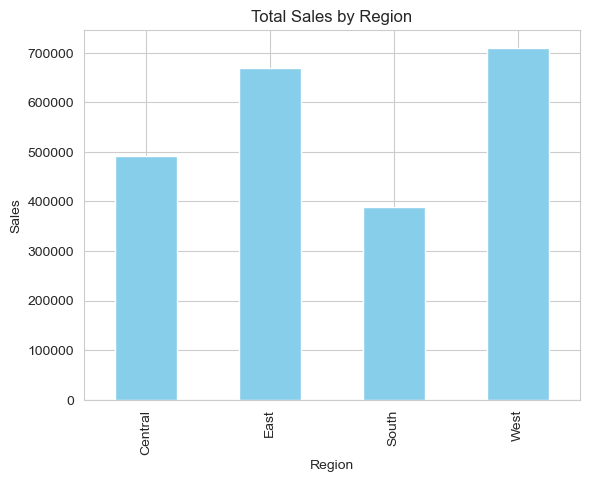

In [17]:
sales_region = data.groupby('Region')['Sales'].sum()
print(sales_region)

sales_region.plot(kind='bar', title='Total Sales by Region', color='skyblue')
plt.ylabel('Sales')
plt.show()


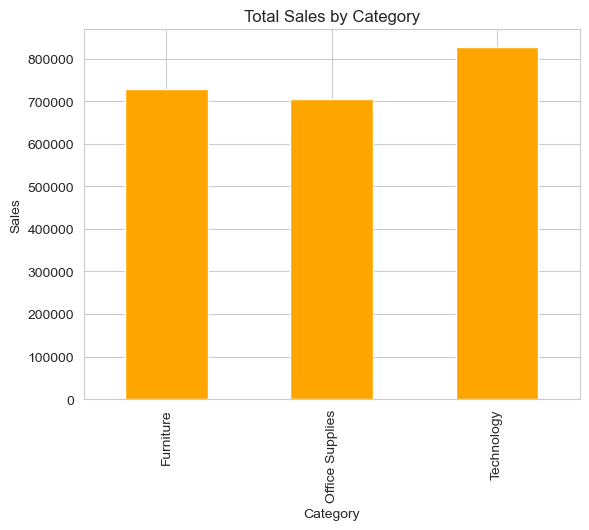

In [18]:
category_sales = data.groupby('Category')['Sales'].sum()
category_sales.plot(kind='bar', title='Total Sales by Category', color='orange')
plt.ylabel('Sales')
plt.show()


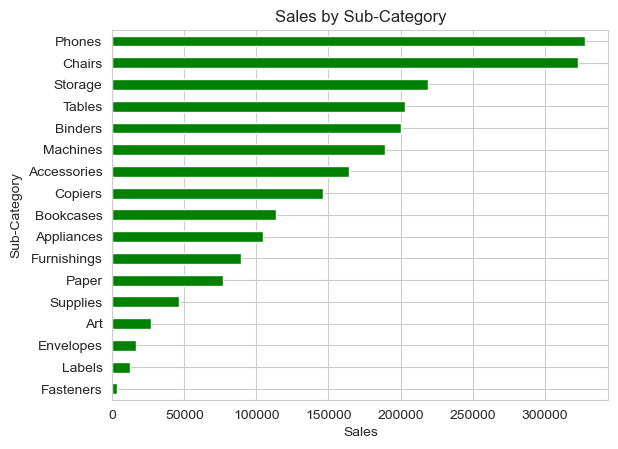

In [19]:
subcat_sales = data.groupby('Sub-Category')['Sales'].sum().sort_values()
subcat_sales.plot(kind='barh', title='Sales by Sub-Category', color='green')
plt.xlabel('Sales')
plt.show()


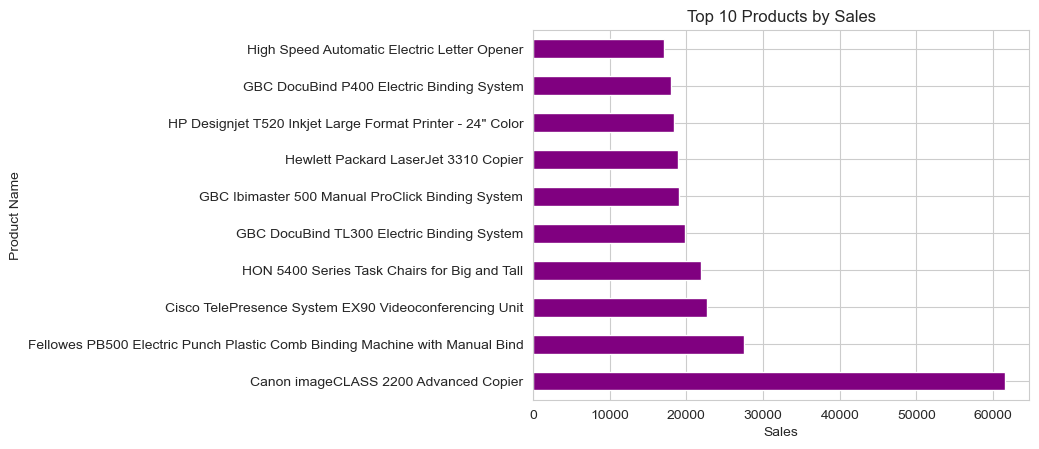

In [20]:
top_products = data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', title='Top 10 Products by Sales', color='purple')
plt.xlabel('Sales')
plt.show()


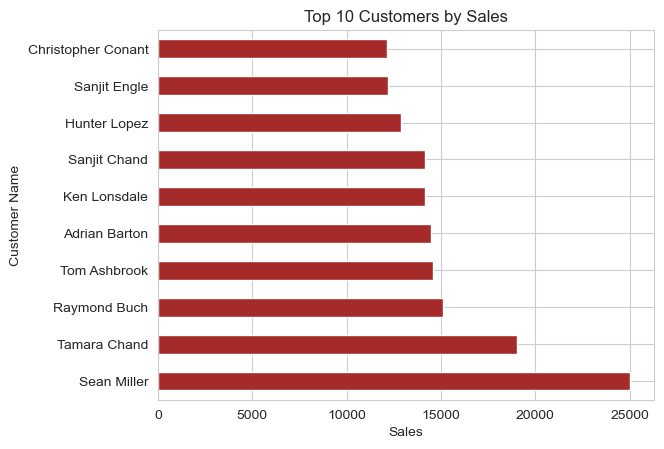

In [21]:
top_customers = data.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)
top_customers.plot(kind='barh', title='Top 10 Customers by Sales', color='brown')
plt.xlabel('Sales')
plt.show()


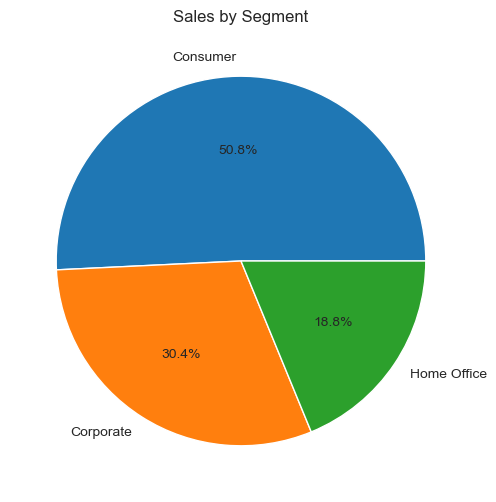

In [22]:
segment_sales = data.groupby('Segment')['Sales'].sum()
segment_sales.plot(kind='pie', autopct='%1.1f%%', title='Sales by Segment', figsize=(6,6))
plt.ylabel('')
plt.show()


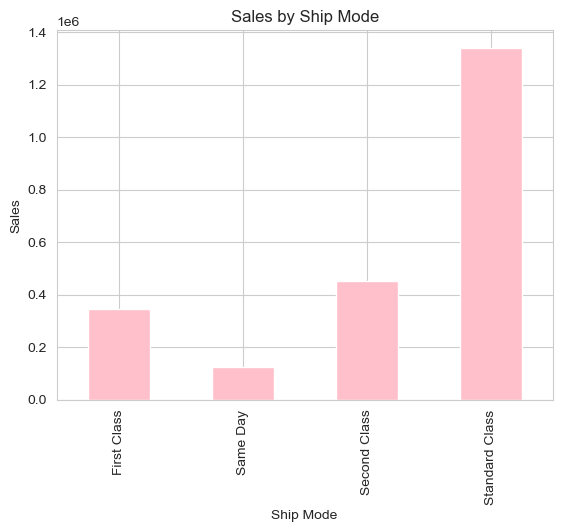

In [23]:
ship_sales = data.groupby('Ship Mode')['Sales'].sum()
ship_sales.plot(kind='bar', title='Sales by Ship Mode', color='pink')
plt.ylabel('Sales')
plt.show()


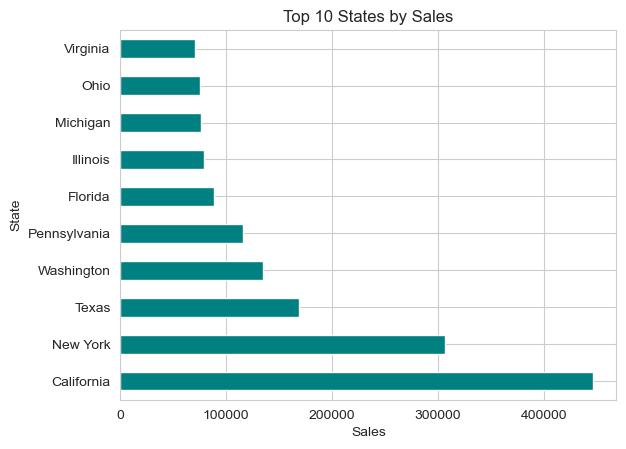

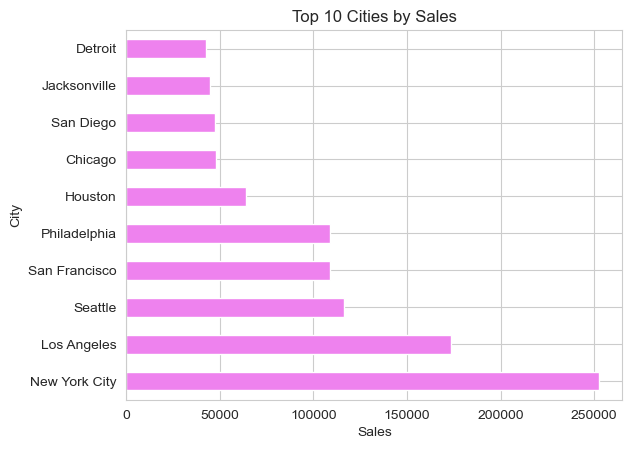

In [24]:
state_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='barh', title='Top 10 States by Sales', color='teal')
plt.xlabel('Sales')
plt.show()

city_sales = data.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)
city_sales.plot(kind='barh', title='Top 10 Cities by Sales', color='violet')
plt.xlabel('Sales')
plt.show()


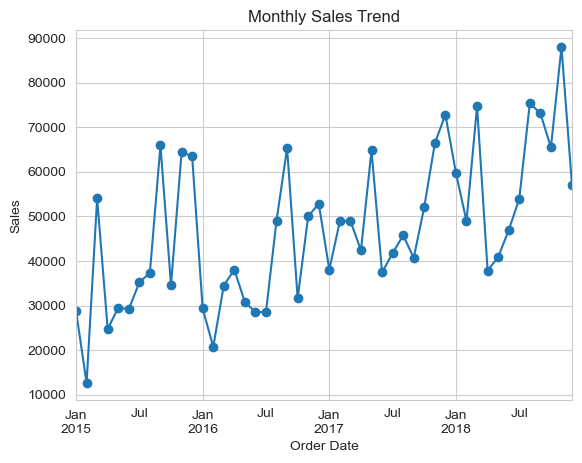

In [27]:
data['Order Date'] = pd.to_datetime(data['Order Date'], format='%d/%m/%Y')

monthly_sales = data.groupby(data['Order Date'].dt.to_period('M'))['Sales'].sum()
monthly_sales.plot(kind='line', marker='o', title='Monthly Sales Trend')
plt.ylabel('Sales')
plt.show()
